In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/Data_Mining/survey_lung_cancer.csv /content

Mounted at /content/gdrive


# **Logistic regression**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the CSV file
file_path = '/content/survey_lung_cancer.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(data.head())

# Convert 'GENDER' and 'LUNG_CANCER' columns to numerical values
label_encoder_gender = LabelEncoder()
data['GENDER'] = label_encoder_gender.fit_transform(data['GENDER'])

label_encoder_cancer = LabelEncoder()
data['LUNG_CANCER'] = label_encoder_cancer.fit_transform(data['LUNG_CANCER'])

# Define features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

# **K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

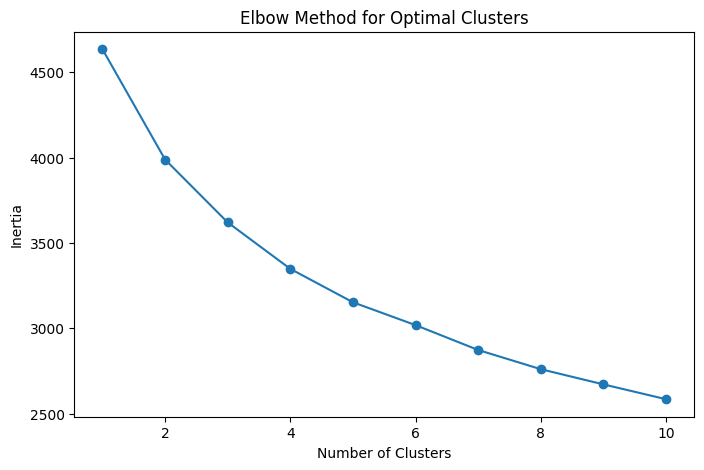

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


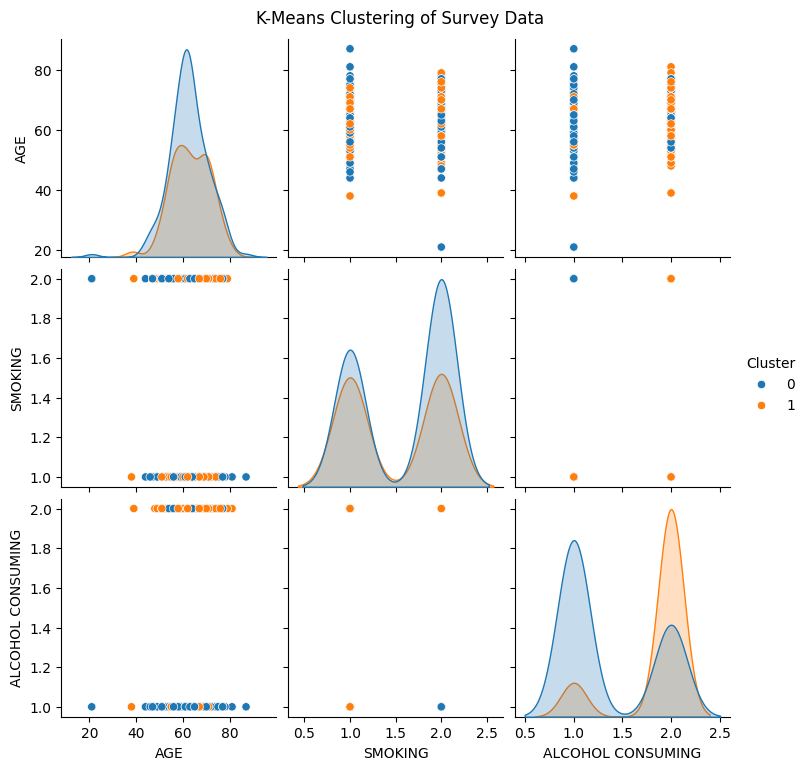

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/survey_lung_cancer.csv'
data = pd.read_csv(file_path)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns: # Iterate through all columns
    if data[column].dtype == 'object': # Check if the column is of object type (likely string)
        data[column] = label_encoder.fit_transform(data[column])

# Handle missing values (if any) - Now it should work after encoding all string columns
data.fillna(data.mean(), inplace=True)

# Drop the target variable for clustering
X_clustering = data.drop('LUNG_CANCER', axis=1)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Fit K-Means with the optimal number of clusters (choose based on the Elbow curve)
optimal_clusters = 2  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Visualize clusters using a pairplot
sns.pairplot(data, hue='Cluster', vars=['AGE', 'SMOKING', 'ALCOHOL CONSUMING'])
plt.suptitle('K-Means Clustering of Survey Data', y=1.02)
plt.show()